<a href="https://colab.research.google.com/github/Juan8078/Tomato-classification/blob/main/Copy_of_Copy_of_CNN_(Final)_Tomat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os #mengiport library yg dibutuhkan!

In [ ]:
set_1 = os.path.join('/content/drive/MyDrive/Proposal skripsi/Dataset/Train/mentah')
set_2 = os.path.join('/content/drive/MyDrive/Proposal skripsi/Dataset/Train/setengah matang_fix')
set_3 = os.path.join('/content/drive/MyDrive/Proposal skripsi/Dataset/Train/matang')
set_4 = os.path.join('/content/drive/MyDrive/Proposal skripsi/Dataset/Train/busuk')

In [ ]:
set_5 = os.path.join('/content/drive/MyDrive/Proposal skripsi/Dataset/Test/mentah')
set_6 = os.path.join('/content/drive/MyDrive/Proposal skripsi/Dataset/Test/setengah matang')
set_7 = os.path.join('/content/drive/MyDrive/Proposal skripsi/Dataset/Test/matang')
set_8 = os.path.join('/content/drive/MyDrive/Proposal skripsi/Dataset/Test/busuk/test busuk')


In [ ]:
print ('total data train tomat Mentah: ', len(os.listdir(set_1)))
print ('total data train tomat setengah matang: ', len(os.listdir(set_2)))
print ('total data train tomat matang: ', len(os.listdir(set_3)))
print ('total data train tomat busuk: ', len(os.listdir(set_4)))

#train test)
print('\n')
print ('total data test tomat mentah: ', len(os.listdir(set_5)))
print ('total data test tomat setengah matang: ', len(os.listdir(set_6)))
print ('total data test tomat matang: ', len(os.listdir(set_7)))
print ('total data test tomat busuk: ', len(os.listdir(set_8)))


total data train tomat Mentah:  400
total data train tomat setengah matang:  411
total data train tomat matang:  467
total data train tomat busuk:  470


total data test tomat mentah:  97
total data test tomat setengah matang:  103
total data test tomat matang:  114
total data test tomat busuk:  97


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# Pengambilan ImageDataGenerator untuk rescale dari lib. keras

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255
                                   )
valid_datagen = ImageDataGenerator(rescale=1./255
                                   )

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Proposal skripsi/Dataset/Train',
                                                    batch_size = 32,
                                                    target_size=(256,256),
                                                    class_mode="categorical",
                                                    seed=46)
validation_generator = valid_datagen.flow_from_directory('/content/drive/MyDrive/Proposal skripsi/Dataset/Test',
                                                         batch_size = 32,
                                                         target_size=(256,256),
                                                         class_mode="categorical",
                                                         seed=46)

Found 1748 images belonging to 4 classes.
Found 411 images belonging to 4 classes.


In [ ]:
label_map=(train_generator.class_indices)
print(label_map)

{'busuk': 0, 'matang': 1, 'mentah': 2, 'setengah matang_fix': 3}


In [ ]:
label_map=(validation_generator.class_indices)
print(label_map)

{'busuk': 0, 'matang': 1, 'mentah': 2, 'setengah matang': 3}


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [ ]:
model = tf.keras.models.Sequential([
    #konvolusi pertama
    # Depth 16, kernel size 3x3 matrix
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', kernel_initializer='he_normal', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #konvolusi kedua
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', kernel_initializer='he_normal'), tf.keras.layers.MaxPooling2D(2,2),
    #konvolusi ketiga
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_normal'), tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_normal'), tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_normal'), tf.keras.layers.MaxPooling2D(2,2),
    #flatten dropout
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    #fully connected layers
    tf.keras.layers.Dense(128, activity_regularizer=regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4, activation='softmax')    #ubah dense dari 6 menjadi 4 (tf.keras.layers.Dense(4, activation='softmax'))
])

In [ ]:
# model = tf.keras.models.Sequential --> buat arsitektur CNN
model = tf.keras.models.Sequential([
    #konvolusi pertama
    # Depth 1, kernel size 5x5 matrix
    tf.keras.layers.Conv2D(3, (5,5), strides= (5,5), input_shape=(255, 255, 3)),
    tf.keras.layers.Conv2D(3, (5,5), strides= (2,2)),
    tf.keras.layers.MaxPooling2D((3,3), strides=(3,3)),

    #flatten dropout
    tf.keras.layers.Flatten(),
    #fully connected layers
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')    #ubah dense dari 6 menjadi 4 (tf.keras.layers.Dense(4, activation='softmax'))
])

In [ ]:
# max pooling --> untuk pengecekan ukuran
# convolution --> mengecilkan ukuran

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 64)        0

In [ ]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate = 0.001)

#compile
model.compile(loss = 'categorical_crossentropy', optimizer= tf.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
history=model.fit(
    train_generator, steps_per_epoch=3, epochs=200, validation_data=validation_generator, validation_steps=3
    )

Epoch 1/200
3/3 [==============================] - 62s 30s/step - loss: 1.4325 - accuracy: 0.4062 - val_loss: 0.9978 - val_accuracy: 0.6979
Epoch 2/200
3/3 [==============================] - 57s 23s/step - loss: 1.0905 - accuracy: 0.5625 - val_loss: 0.6923 - val_accuracy: 0.9896
Epoch 3/200
3/3 [==============================] - 45s 18s/step - loss: 0.8102 - accuracy: 0.8021 - val_loss: 0.4861 - val_accuracy: 1.0000
Epoch 4/200
3/3 [==============================] - 33s 13s/step - loss: 0.6834 - accuracy: 0.7604 - val_loss: 0.2377 - val_accuracy: 1.0000
Epoch 5/200
3/3 [==============================] - 39s 17s/step - loss: 0.4846 - accuracy: 0.8750 - val_loss: 0.1584 - val_accuracy: 1.0000
Epoch 6/200
3/3 [==============================] - 18s 7s/step - loss: 0.3182 - accuracy: 0.9375 - val_loss: 0.1187 - val_accuracy: 1.0000
Epoch 7/200
3/3 [==============================] - 18s 6s/step - loss: 0.3105 - accuracy: 0.9375 - val_loss: 0.1127 - val_accuracy: 1.0000
Epoch 8/200
3/3 [=====

In [ ]:
import tensorflow as tf
tf.keras.models.save_model(model, 'modelcnn_final.hdf5')

<ipython-input-19-21d8897f1c56>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, 'modelcnn_final.hdf5')


In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

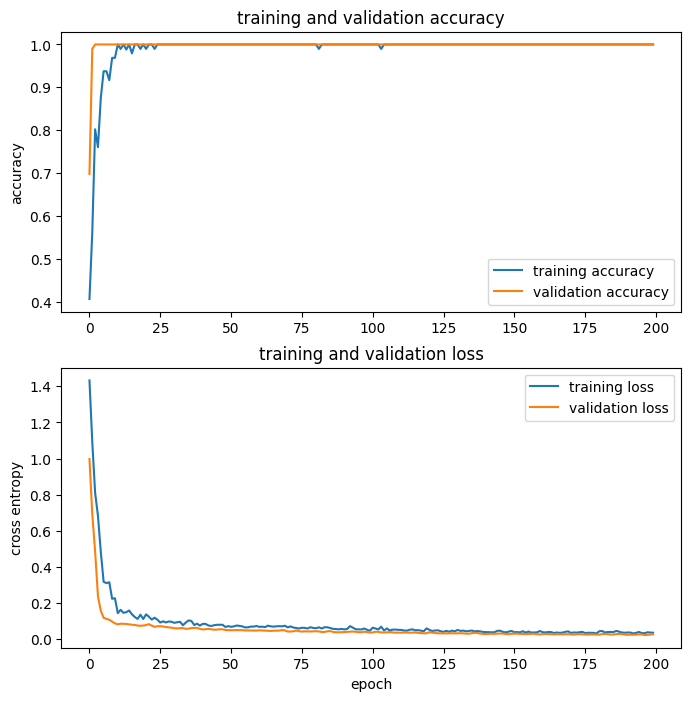

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='training accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.title('training and validation accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='training loss')
plt.plot(val_loss, label='validation loss')
plt.legend(loc='upper right')
plt.ylabel('cross entropy')
plt.title('training and validation loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.evaluate(validation_generator)

13/13 [==============================] - 8s 559ms/step - loss: 0.0289 - accuracy: 1.0000


[0.028906602412462234, 1.0]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255)
test_data_generator=test_generator.flow_from_directory('/content/drive/MyDrive/Proposal skripsi/Dataset/Test',
                                                       target_size = (256,256), batch_size=30, shuffle=False)

Found 411 images belonging to 4 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0 : busuk
1 : matang
2 : mentah
3 : setengah matang


<ipython-input-33-a981c2aa7fe1>:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  prediksi=model.predict_generator(test_data_generator)


Text(0.5, 58.7222222222222, 'Prediksi')

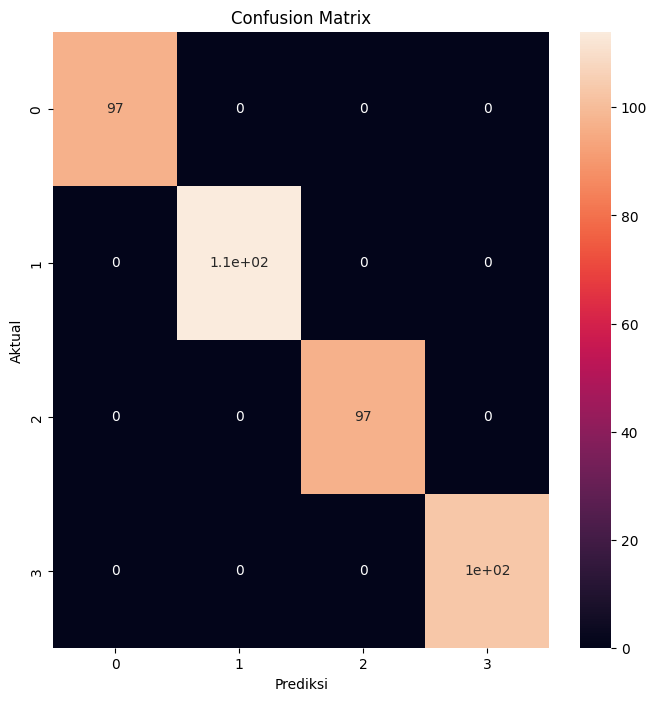

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

for x in label_map:
      print(label_map[x],":",x)

prediksi=model.predict_generator(test_data_generator)
y_pred=np.argmax(prediksi,axis=1)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(test_data_generator.classes,y_pred),annot=True)
plt.title("Confusion Matrix")
plt.ylabel("Aktual")
plt.xlabel("Prediksi")




In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_data_generator.classes,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       114
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00       103

    accuracy                           1.00       411
   macro avg       1.00      1.00      1.00       411
weighted avg       1.00      1.00      1.00       411



In [ ]:
print(confusion_matrix(test_data_generator.classes,y_pred))

[[ 97   0   0   0]
 [  0 114   0   0]
 [  0   0  97   0]
 [  0   0   0 103]]
